# Tree Based Models

In this notebook, we will model the relation between weather data and adjusted bike trips using decision tree regression model, as well as boosting algorithm based on decision trees.

## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
# import training data
bike_train = pd.read_csv('../EDA/bikeshare_train_data.csv')

In [4]:
bike_train.columns

Index(['Date', 'day_length', 'min_temp', 'max_temp', 'mean_temp', 'temp_diff',
       'hdd', 'cdd', 'rain', 'snow', 'total_precip', 'snow_on_ground',
       'max_gust', 'mean_dep_temp', 'mean_ret_temp', 'mean_ride_temp',
       'total_dist', 'total_duration', 'ebike_trips', 'num_trips',
       'adj_num_trips'],
      dtype='object')

In [5]:
# import testing data, though we shouldn't need it while doing cross validation
# bike_test = pd.read_csv('../EDA/bikeshare_test_data.csv')

In [6]:
# record the coefficients of polynomial regression of trend from previous notebook
trend_reg_type = 'polynomial'
intercept = 365.77928898911864
a_1 = 1.54942756e+00
a_2 = -2.91076556e-03
a_3 = 1.30275522e-06
shift = 1318.3332525370422 
# 'shift' is the amount by which we shifted the adj_num_trips in order to make all values non-negative

## Decision Tree Regressor

We first build a decision tree regressor with feature set chosen from 'max_temp', 'hdd', 'total_precip'.

In [7]:
features = ['max_temp', 'total_precip', 'max_gust', 'day_length']

In [8]:
# define powerset function to return all subset of a list

from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
MAX_DEPTH = 10

In [12]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=16, shuffle=True)

In [13]:
mses_train = np.zeros((5,2**len(features)-1,MAX_DEPTH))
mses_val = np.zeros((5,2**len(features)-1,MAX_DEPTH))
# the first component refers to validation number, the second component refers to the feature used, 
# the third refers to the max_depth of the tree

In [14]:
cv_count = 0

for train_index, test_index in kfold.split(bike_train):
    feature_count = 0
    cv_train = bike_train.iloc[train_index]
    cv_val = bike_train.iloc[test_index]
    for feature in powerset(features):
        feature = list(feature)
        if len(feature) > 0:
            for max_depth in range(1,MAX_DEPTH+1):
                print(f'Fitting tree model with features {feature} and max depth {max_depth}')
                tree = DecisionTreeRegressor(max_depth = max_depth)
                tree.fit(cv_train[feature],cv_train['adj_num_trips'])
        
                # predict
                pred_train = tree.predict(cv_train[feature])
                pred_val = tree.predict(cv_val[feature])
                
                # compute mse and store
                mse_train = np.sqrt(mean_squared_error(cv_train['adj_num_trips'], pred_train))
                mse_val = np.sqrt(mean_squared_error(cv_val['adj_num_trips'], pred_val))
                mses_train[cv_count,feature_count,max_depth-1] = mse_train
                mses_val[cv_count,feature_count,max_depth-1] = mse_val
                
                # plot the in-sample and out-of-sample prediction with true values
#                 fig, ax = plt.subplots(1,2,figsize = (12,5))
#                 sns.scatterplot(x=bike_train['time'], y=bike_train['adj_num_trips'], ax=ax[0], color='blue', alpha=0.5)
#                 sns.scatterplot(x=bike_train['time'], y=pred_train, ax=ax[0], color='orange')
            
#                 sns.scatterplot(x=bike_test['time'], y=bike_test['adj_num_trips'], ax=ax[1], color='blue', alpha=0.5)
#                 sns.scatterplot(x=bike_test['time'], y=pred_test, ax=ax[1], color='orange') 
            
#                 plt.show()
            
                # plot the residue plot
            
#                 if len(feature) == 1:
                
#                     fig, ax = plt.subplots(1,2,figsize = (12,5))
#                     sns.scatterplot(x=bike_train[feature[0]], y=bike_train['adj_num_trips'] - pred_train, ax=ax[0], color='green')
#                     sns.scatterplot(x=bike_test[feature[0]], y=bike_test['adj_num_trips'] - pred_test, ax=ax[1], color='green')
#                     ax[0].set_title(f'Residue plot of adj_num_trips against {feature[0]} in training data')
#                     ax[1].set_title(f'Residue plot of adj_num_trips against {feature[0]} in testing data')
                
#                     plt.show()
            feature_count += 1
    cv_count += 1

Fitting tree model with features ['max_temp'] and max depth 1
Fitting tree model with features ['max_temp'] and max depth 2
Fitting tree model with features ['max_temp'] and max depth 3
Fitting tree model with features ['max_temp'] and max depth 4
Fitting tree model with features ['max_temp'] and max depth 5
Fitting tree model with features ['max_temp'] and max depth 6
Fitting tree model with features ['max_temp'] and max depth 7
Fitting tree model with features ['max_temp'] and max depth 8
Fitting tree model with features ['max_temp'] and max depth 9
Fitting tree model with features ['max_temp'] and max depth 10
Fitting tree model with features ['total_precip'] and max depth 1
Fitting tree model with features ['total_precip'] and max depth 2
Fitting tree model with features ['total_precip'] and max depth 3
Fitting tree model with features ['total_precip'] and max depth 4
Fitting tree model with features ['total_precip'] and max depth 5
Fitting tree model with features ['total_precip']

Fitting tree model with features ['max_temp', 'max_gust', 'day_length'] and max depth 3
Fitting tree model with features ['max_temp', 'max_gust', 'day_length'] and max depth 4
Fitting tree model with features ['max_temp', 'max_gust', 'day_length'] and max depth 5
Fitting tree model with features ['max_temp', 'max_gust', 'day_length'] and max depth 6
Fitting tree model with features ['max_temp', 'max_gust', 'day_length'] and max depth 7
Fitting tree model with features ['max_temp', 'max_gust', 'day_length'] and max depth 8
Fitting tree model with features ['max_temp', 'max_gust', 'day_length'] and max depth 9
Fitting tree model with features ['max_temp', 'max_gust', 'day_length'] and max depth 10
Fitting tree model with features ['total_precip', 'max_gust', 'day_length'] and max depth 1
Fitting tree model with features ['total_precip', 'max_gust', 'day_length'] and max depth 2
Fitting tree model with features ['total_precip', 'max_gust', 'day_length'] and max depth 3
Fitting tree model 

Fitting tree model with features ['total_precip', 'day_length'] and max depth 10
Fitting tree model with features ['max_gust', 'day_length'] and max depth 1
Fitting tree model with features ['max_gust', 'day_length'] and max depth 2
Fitting tree model with features ['max_gust', 'day_length'] and max depth 3
Fitting tree model with features ['max_gust', 'day_length'] and max depth 4
Fitting tree model with features ['max_gust', 'day_length'] and max depth 5
Fitting tree model with features ['max_gust', 'day_length'] and max depth 6
Fitting tree model with features ['max_gust', 'day_length'] and max depth 7
Fitting tree model with features ['max_gust', 'day_length'] and max depth 8
Fitting tree model with features ['max_gust', 'day_length'] and max depth 9
Fitting tree model with features ['max_gust', 'day_length'] and max depth 10
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip', 'max_g

Fitting tree model with features ['max_temp', 'max_gust'] and max depth 4
Fitting tree model with features ['max_temp', 'max_gust'] and max depth 5
Fitting tree model with features ['max_temp', 'max_gust'] and max depth 6
Fitting tree model with features ['max_temp', 'max_gust'] and max depth 7
Fitting tree model with features ['max_temp', 'max_gust'] and max depth 8
Fitting tree model with features ['max_temp', 'max_gust'] and max depth 9
Fitting tree model with features ['max_temp', 'max_gust'] and max depth 10
Fitting tree model with features ['max_temp', 'day_length'] and max depth 1
Fitting tree model with features ['max_temp', 'day_length'] and max depth 2
Fitting tree model with features ['max_temp', 'day_length'] and max depth 3
Fitting tree model with features ['max_temp', 'day_length'] and max depth 4
Fitting tree model with features ['max_temp', 'day_length'] and max depth 5
Fitting tree model with features ['max_temp', 'day_length'] and max depth 6
Fitting tree model with f

Fitting tree model with features ['max_temp'] and max depth 6
Fitting tree model with features ['max_temp'] and max depth 7
Fitting tree model with features ['max_temp'] and max depth 8
Fitting tree model with features ['max_temp'] and max depth 9
Fitting tree model with features ['max_temp'] and max depth 10
Fitting tree model with features ['total_precip'] and max depth 1
Fitting tree model with features ['total_precip'] and max depth 2
Fitting tree model with features ['total_precip'] and max depth 3
Fitting tree model with features ['total_precip'] and max depth 4
Fitting tree model with features ['total_precip'] and max depth 5
Fitting tree model with features ['total_precip'] and max depth 6
Fitting tree model with features ['total_precip'] and max depth 7
Fitting tree model with features ['total_precip'] and max depth 8
Fitting tree model with features ['total_precip'] and max depth 9
Fitting tree model with features ['total_precip'] and max depth 10
Fitting tree model with feat

Fitting tree model with features ['max_temp', 'max_gust', 'day_length'] and max depth 7
Fitting tree model with features ['max_temp', 'max_gust', 'day_length'] and max depth 8
Fitting tree model with features ['max_temp', 'max_gust', 'day_length'] and max depth 9
Fitting tree model with features ['max_temp', 'max_gust', 'day_length'] and max depth 10
Fitting tree model with features ['total_precip', 'max_gust', 'day_length'] and max depth 1
Fitting tree model with features ['total_precip', 'max_gust', 'day_length'] and max depth 2
Fitting tree model with features ['total_precip', 'max_gust', 'day_length'] and max depth 3
Fitting tree model with features ['total_precip', 'max_gust', 'day_length'] and max depth 4
Fitting tree model with features ['total_precip', 'max_gust', 'day_length'] and max depth 5
Fitting tree model with features ['total_precip', 'max_gust', 'day_length'] and max depth 6
Fitting tree model with features ['total_precip', 'max_gust', 'day_length'] and max depth 7
Fit

Fitting tree model with features ['max_gust', 'day_length'] and max depth 6
Fitting tree model with features ['max_gust', 'day_length'] and max depth 7
Fitting tree model with features ['max_gust', 'day_length'] and max depth 8
Fitting tree model with features ['max_gust', 'day_length'] and max depth 9
Fitting tree model with features ['max_gust', 'day_length'] and max depth 10
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 2
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 3
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 4
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 5
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 6
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and m

In [15]:
# compute the average of rmses
avg_rmses_train = np.zeros((2**len(features)-1,MAX_DEPTH))
avg_rmses_val = np.zeros((2**len(features)-1,MAX_DEPTH))
for i in range(2**len(features)-1):
    for j in range(MAX_DEPTH):
        avg_rmses_train[i,j] = mses_train[:,i,j].mean()
        avg_rmses_val[i,j] = mses_val[:,i,j].mean()

In [16]:
ind_train = np.unravel_index(np.argmin(avg_rmses_train, axis=None), avg_rmses_train.shape)
ind_val = np.unravel_index(np.argmin(avg_rmses_val, axis=None), avg_rmses_val.shape)

In [17]:
print(ind_train)
print(ind_val)

(14, 9)
(4, 5)


The minimum average rmse on validation set happens when max_depth = 6 and the features used are ['max_temp', 'total_precip']

In [18]:
print('The minimum of the average validation rmse among all the decision tree regressor is', avg_rmses_val[ind_val])
print('The average training rmse of the tree above is', avg_rmses_train[ind_val])

The minimum of the average validation rmse among all the decision tree regressor is 536.1533328251896
The average training rmse of the tree above is 477.0225311056617


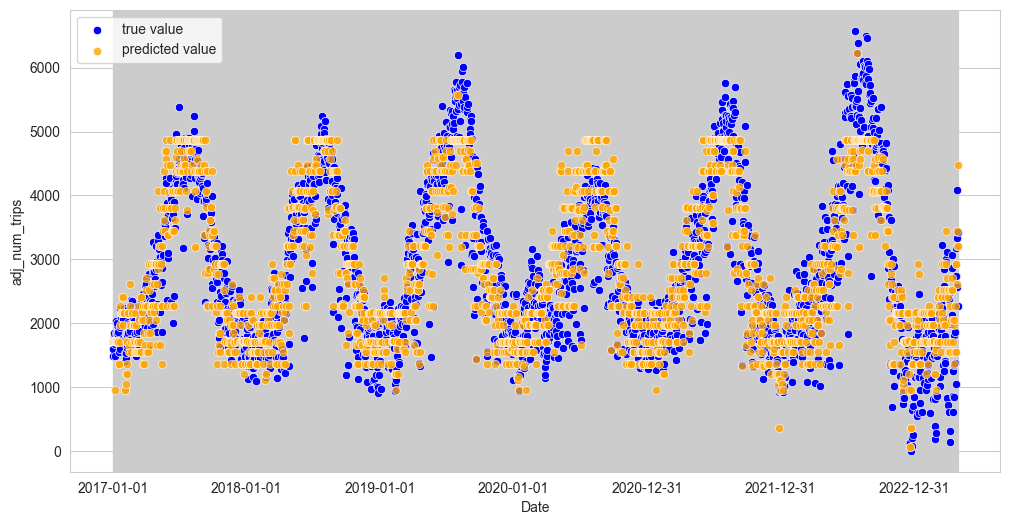

In [19]:
tree = DecisionTreeRegressor(max_depth = 6)
tree.fit(bike_train[['max_temp','total_precip']],bike_train['adj_num_trips'])
pred = tree.predict(bike_train[['max_temp','total_precip']])
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=bike_train['Date'], y=bike_train['adj_num_trips'], color='blue', ax=ax, label='true value')
sns.scatterplot(x=bike_train['Date'], y=pred, color='orange', ax=ax, alpha=0.8, label='predicted value')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 365 == 0:  # every 6th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.legend()
plt.show()

## Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingRegressor